In [20]:
import pathlib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
path = pathlib.Path('D:\Data Science\Real-Time-Data-Analysis\data\\raw\data-v1.csv')

df = pd.read_csv(path)

In [5]:
df.head()

,index,Open,High,Low,Close,Adj Close,Volume
0,2022-08-01 09:30:00,19.360001,19.525000,19.350000,19.455000,19.455000,1543009
1,2022-08-01 10:30:00,19.459999,19.620001,19.450001,19.620001,19.620001,781953
2,2022-08-01 11:30:00,19.610001,19.620001,19.504999,19.525000,19.525000,613057
3,2022-08-01 12:30:00,19.525000,19.540001,19.480000,19.495001,19.495001,734559
4,2022-08-01 13:30:00,19.500000,19.540001,19.480000,19.530001,19.530001,1195479


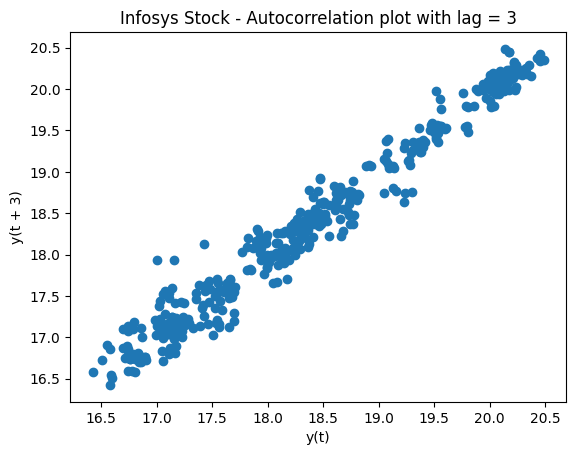

In [7]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('Infosys Stock - Autocorrelation plot with lag = 3')
plt.show()

In [12]:
df.describe(include='all')

,index,Open,High,Low,Close,Adj Close,Volume
count,455,455.000000,455.000000,455.000000,455.000000,455.000000,4.550000e+02
unique,455,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-08-01 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18.446047,18.503086,18.395451,18.449305,18.449305,1.160302e+06
std,NaN,1.113284,1.102984,1.122986,1.113832,1.113832,9.572886e+05
min,NaN,16.424999,16.545000,16.389999,16.424999,16.424999,1.706300e+05
25%,NaN,17.514999,17.600000,17.450000,17.525001,17.525001,5.370620e+05
50%,NaN,18.365000,18.420000,18.320000,18.365000,18.365000,8.426680e+05
75%,NaN,19.390000,19.435000,19.347500,19.392500,19.392500,1.486831e+06


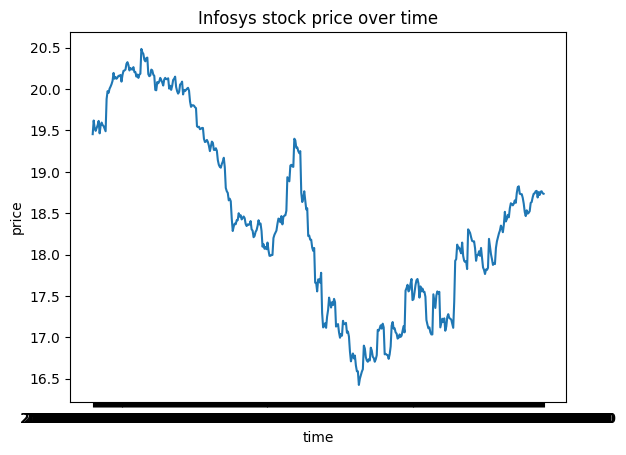

In [18]:
plt.plot(df["index"], df["Close"])
# plt.xticks(np.arange(0,455, 100), df['index'][0:455:100])
plt.title("Infosys stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [23]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.013842255520304565


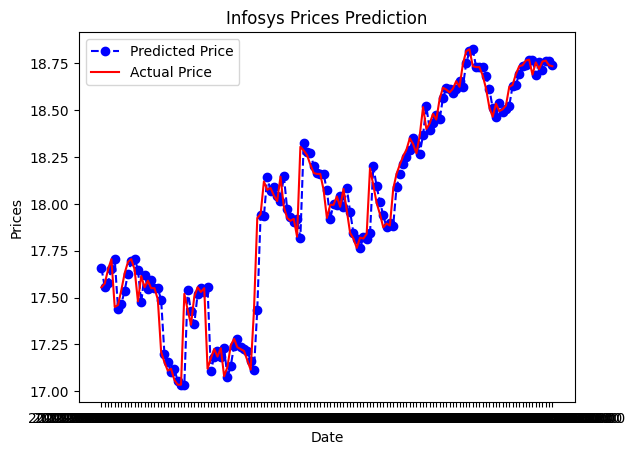

In [29]:
test_set_range = df[int(len(df)*0.7):]
plt.plot(test_set_range['index'], model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range['index'], test_data, color='red', label='Actual Price')
plt.title('Infosys Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()